# Response Time: Some Statistics
This is a notebook that explores response time of the tweets.
For questions, contact Alicia.

## Set-up:
### Imports:
Firth the necessary packages are imported:

In [1]:
# IMPORTS
import sys
sys.path.append("../DBL-Data-Challenge")

# Own functions
from database.connect import getConnection
from notebooks.response2 import response_time_id, response_time_calc, user_id_to_user, replied_sentiment, mentions_length, length
import matplotlib.pyplot as plt
import numpy as np


# Packages
import pandas as pd
import seaborn as sns
import matplotlib as plt
sns.set()

Then a connection to a MySQL database is set up.

In [2]:
# Get connection
try:
    connection = getConnection()
except Exception:
    print("✖️ Error while connecting to MySQL engine database.")
    print("ℹ️ Please make sure the environment file `.env` is located at"+
        "the project root directory and contains proper configuration.")
    raise

### Creating the datafrane:
All the relevant data is fetched from the table. A list is used to keep track of the index of the columns.

In [3]:
# query relevant data and fetch it
cursor = connection.cursor()
query_columns = ['id', 'text', 'in_reply_to_status_id', 'timestamp_ms', 'user_id', 'language', 'mentions', 'airlines', 'sentiment']
query="SELECT id, text, in_reply_to_status_id, timestamp_ms, user_id, language, mentions, airlines, sentiment FROM tweets LIMIT 1000"
cursor.execute(query)
tweets = cursor.fetchall()

A Pandas dataframe is created from this data, with the relevant columns for the analysis. The necessary functions are imported from response2.py

In [4]:
"""Creating the dataframe
    :columns: [response_time, tweet_sentiment, mentions, tweet_length]
    :values: [int (ms), float in range(-1, 1), list(str), int]
"""

# Creating the dataframe
df_columns = ['response_time', 'self_sentiment', 'replied_sentiment', 'user_name', 'language', 'mention_count', 'airline', 'tweet_length']
df_data = pd.DataFrame(columns=df_columns)

# Replace iteration with to dataframe.
counter = 0

# Read data from tweets with desired limit
for tuple in tweets:  
    dict = {'response_time': 'Null', 'self_sentiment': 'Null', 'replied_sentiment': 'Null', 'user_name': 'Null', 'language': 'Null', 'mention_count': 'Null', 'airline': 'Null', 'tweet_length': 'Null'}
        
    # Response time -> int, unit: ms
    try:
        dict['response_time'] = response_time_id(tuple[query_columns.index('id')], cursor) 
    except Exception:
        pass   

    # Sentiment detection -> float, in range(-1, 1)
    try:
        dict['self_sentiment'] = tuple[query_columns.index('sentiment')]
    except Exception:
        pass
    
    # Sentiment of parent tweet -> float, in range(-1, 1)
    try:
        dict['replied_sentiment'] = replied_sentiment(tuple[query_columns.index('in_reply_to_status_id')], cursor)
    except Exception:
        pass

    # Sentiment of parent tweet -> float, in range(-1, 1)
    try:
        dict['user_name'] = user_id_to_user(int(tuple[query_columns.index('in_reply_to_status_id')]))
    except Exception:
        pass

    # Sentiment detection -> float, in range(-1, 1)
    try:
        dict['language'] = tuple[query_columns.index('language')]
    except Exception:
        pass

    # User mentions -> list(str, str, ...)
    try:
        dict['mention_count'] = mentions_length(tuple[query_columns.index('mentions')])
    except Exception:
        pass
    
     # Airline -> list(str)
    try:
        dict['airline'] = tuple[query_columns.index('airlines')]
    except Exception:
        pass   

    # Tweet length -> int
    try:    
        dict['tweet_length'] = length(tuple[query_columns.index('text')])
    except Exception:
        pass

    # Add to dataframe
    df_dict = pd.DataFrame([dict])
    df_data = pd.concat([df_data, df_dict], ignore_index=True)
    counter += 1
    print(counter)

# Close connection
cursor.close()
connection.close()

df_data.count()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


response_time        1000
self_sentiment       1000
replied_sentiment    1000
user_name            1000
language             1000
mention_count        1000
airline              1000
tweet_length         1000
dtype: int64

In [5]:
df_data.head()

,response_time,self_sentiment,replied_sentiment,user_name,language,mention_count,airline,tweet_length
0,no_reply,-0.462126,Null,not_airline,en,3,[],140
1,no_reply,0.164795,Null,not_airline,en,1,[british_airways],16
2,no_reply,0.929742,Null,not_airline,en,3,[americanair],140
3,no_reply,0.043662,Null,not_airline,en,3,[klm],140
4,no_reply,-0.630411,Null,not_airline,en,0,[easyjet],77


In [6]:

#df_data.to_csv('response_time_top_5hundredthousands.csv')

Since the value of most reponse times are "no_reply" and thus unlikely to see another value in the head, a double check is needed to see if everything was added correctly. The same applies to replied_sentiment.

In [7]:
#df_csv = pd.read_csv('data-csv/response_time_top_5hundredthousands.csv')
#df_csv.head()

df_csv = df_data
df_csv.head()


,response_time,self_sentiment,replied_sentiment,user_name,language,mention_count,airline,tweet_length
0,no_reply,-0.462126,Null,not_airline,en,3,[],140
1,no_reply,0.164795,Null,not_airline,en,1,[british_airways],16
2,no_reply,0.929742,Null,not_airline,en,3,[americanair],140
3,no_reply,0.043662,Null,not_airline,en,3,[klm],140
4,no_reply,-0.630411,Null,not_airline,en,0,[easyjet],77


In [8]:
# Check if the response time was added successfully
for i in range(0, len(df_csv.index)):
    if df_csv.loc[i, 'response_time'] != 'no_reply' and df_csv.loc[i, 'response_time'] != 'Null':
        print('Response Time: Successfully added!')
        print(f"   example: {df_csv.loc[i, 'response_time']}")
        break

Response Time: Successfully added!
   example: 0.039820555555555553


In [9]:
# Check if the response time was added successfully
for i in range(0, len(df_csv.index)):
    if df_csv.loc[i, 'replied_sentiment'] != 'Null':
        print('Replied Sentiment: Successfully added!')
        print(f"   example: {df_csv.loc[i, 'replied_sentiment']}")
        break

Replied Sentiment: Successfully added!
   example: 0.0291504


In [10]:
# Check if the response time was added successfully
for i in range(0, len(df_csv.index)):
    if df_csv.loc[i, 'user_name'] != 'not_airline' and df_csv.loc[i, 'user_name'] != 'Null':
        print('User names: Successfully added!')
        print(f"   example: {df_csv.loc[i, 'user_name']}")
        break

## Statistics and Plots
First we give some basic statistics.

In [9]:
# Response time basic statistics
df_csv['response_time'].describe(include='all')

count      1139627
unique      305472
top       no_reply
freq        825293
Name: response_time, dtype: object

### EDA: Reply-rate Barplot:

In [10]:
print(len(df_csv.index))

1139627


In [11]:
no_reply_count = df_csv['response_time'].value_counts()['no_reply']
reply_count = (len(df_csv.index) - no_reply_count)

df_reply_rate = pd.DataFrame([{'reply_count': reply_count / len(df_csv.index), 'no_reply_count': no_reply_count / len(df_csv.index)}])
df_reply_rate.head()

,reply_count,no_reply_count
0,0.275822,0.724178


Text(0, 0.5, 'Percentage [%]')

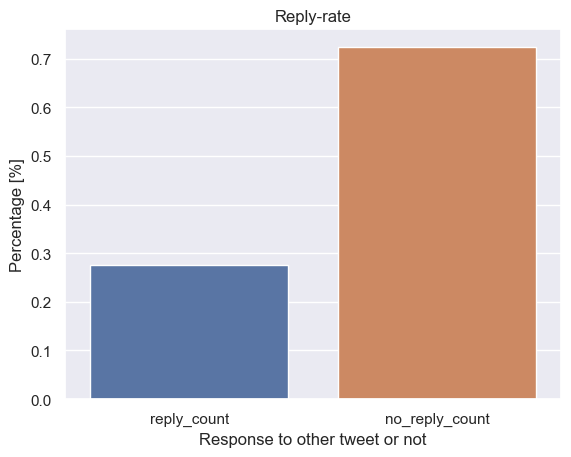

In [12]:
ax = sns.barplot(df_reply_rate)
ax.set_title("Reply-rate")
ax.set_xlabel('Response to other tweet or not')
ax.set_ylabel('Percentage [%]')

### Response time scatter plot over parent sentiment, per airline
This provides an intersting insight into how the response time depends on the sentiment for differnt airlines.

In [13]:
# Root-dataframe
df_csv.head()

,Unnamed: 0,response_time,self_sentiment,replied_sentiment,language,mention_count,airline,tweet_length
0,0,no_reply,-0.462126,Null,en,3,[],140
1,1,no_reply,0.164795,Null,en,1,[british_airways],16
2,2,no_reply,0.929742,Null,en,3,[americanair],140
3,3,no_reply,0.043662,Null,en,3,[klm],140
4,4,no_reply,-0.630411,Null,en,0,[easyjet],77


In [14]:
# Select relevant parts of the dataframe
columns = ['response_time', 'replied_sentiment', 'airline']

df_sentiment_responsetime = df_csv.loc[df_csv['response_time'] != 'no_reply'][columns].reset_index(drop=True)
df_sentiment_responsetime.replace(to_replace='[americanair]', value='AmericanAir', inplace=True)
df_sentiment_responsetime.replace(to_replace='[british_airways]', value='BritishAirways', inplace=True)
df_sentiment_responsetime.loc[~df_sentiment_responsetime['airline'].str.contains('BritishAirways|AmericanAir'), 'airline'] = "Other"


df_sentiment_responsetime.head()


,response_time,replied_sentiment,airline
0,0.039820555555555553,0.0291504,Other
1,0.05509888888888889,-0.860331,Other
2,0.013761388888888889,0.0758163,BritishAirways
3,0.07936027777777778,0.0758163,BritishAirways
4,0.1976763888888889,0.673432,Other


In [15]:
# Check if airline-column are correctly defined
for i in range(0, len(df_sentiment_responsetime.index)):
    if df_sentiment_responsetime.loc[i, 'airline'] == 'AmericanAir':
        print('Airline: Successfully added!')
        print(f"   example: {df_sentiment_responsetime.loc[i, 'airline']}")
        break


Airline: Successfully added!
   example: AmericanAir


In [28]:
df_csv.head()

,Unnamed: 0,response_time,self_sentiment,replied_sentiment,language,mention_count,airline,tweet_length
0,0,no_reply,-0.462126,Null,en,3,[],140
1,1,no_reply,0.164795,Null,en,1,[british_airways],16
2,2,no_reply,0.929742,Null,en,3,[americanair],140
3,3,no_reply,0.043662,Null,en,3,[klm],140
4,4,no_reply,-0.630411,Null,en,0,[easyjet],77


In [20]:
df_sentiment_responsetime_limit = df_sentiment_responsetime.loc[0:999]
print(len(df_sentiment_responsetime_limit.index))

1000


In [27]:
df_sentiment_responsetime_limit = df_sentiment_responsetime_limit.round(decimals=3)
df_sentiment_responsetime_limit.head()

KeyError: 'reponse_time'

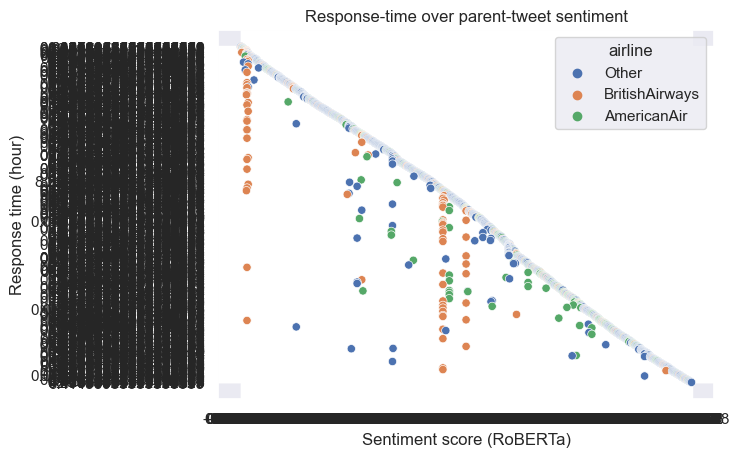

In [24]:
ax = sns.scatterplot(data=df_sentiment_responsetime_limit, x='replied_sentiment', y='response_time', hue='airline')
ax.set_title("Response-time over parent-tweet sentiment")
ax.set_xlabel('Sentiment score (RoBERTa)')
ax.set_ylabel('Response time (hour)');

### Boxplot of reply time per competitor airplanes and in general.

In [15]:
df_user = 0


df_user_time_clean = pd.DataFrame()

for i in range(0, len(df_user.index)):
    if df_user.loc[i, 'response_time'] != 0:
        dict = {'response_time': (df_user.loc[i, 'response_time'])/(1000*60*60), 'airline': df_user.loc[i, 'airline']}
        df_dict = pd.DataFrame([dict])
        df_user_time_clean = pd.concat([df_user_time_clean, df_dict], ignore_index=True)
        
df_user_time_clean.head()


AttributeError: 'int' object has no attribute 'index'

In [ ]:
ax = sns.boxplot(data=df_user_time_clean, x='airline', y='response_time', showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel('Airlines')
ax.set_ylabel('Reply time (hours)')
ax.set_title('Boxplot of reply time per airline');